In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ig = pd.read_csv('instagram.csv', sep=',')
ig

post_id  account_id account_type  follower_count media_type  \
0      IG0000001           7        brand            3551       reel   
1      IG0000002          20      creator           31095      image   
2      IG0000003          15        brand            8167       reel   
3      IG0000004          11      creator            9044   carousel   
4      IG0000005           8      creator           15986       reel   
...          ...         ...          ...             ...        ...   
29994  IG0029995           5        brand           10739   carousel   
29995  IG0029996           3        brand           10018      image   
29996  IG0029997          18      creator            7486      image   
29997  IG0029998           6      creator           10034   carousel   
29998  IG0029999           9      creator            6916      image   

      content_category traffic_source  has_call_to_action  \
0           Technology      Home Feed                   1   
1              Fitness       Hashtags                   1   
2               Beauty     Reels Feed                   0   
3                Music       External                   0   
4           Technology        Profile                   0   
...                ...            ...                 ...   
29994           Travel     Reels Feed                   0   
29995           Beauty       Hashtags                   0   
29996      Photography        Explore                   1   
29997       Technology        Explore                   1   
29998       Technology        Explore                   1   

             post_datetime   post_date  ...  comments shares  saves  reach  \
0      2024-11-30 06:00:00  2024-11-30  ...         5      7     34   4327   
1      2025-08-15 15:00:00  2025-08-15  ...        10     21     68   7451   
2      2025-09-11 16:00:00  2025-09-11  ...         2      1     22   1639   
3      2025-09-18 03:00:00  2025-09-18  ...         0      7      0   2877   
4      2025-03-21 09:00:00  2025-03-21  ...         8      5     21   5350   
...                    ...         ...  ...       ...    ...    ...    ...   
29994  2024-12-18 10:00:00  2024-12-18  ...         1      2      5   1564   
29995  2025-05-05 15:00:00  2025-05-05  ...         2      1      7   2042   
29996  2025-05-26 10:00:00  2025-05-26  ...        10     16     59   5887   
29997  2025-08-02 19:00:00  2025-08-02  ...         3      0     19   5372   
29998  2025-04-15 20:00:00  2025-04-15  ...         1      1      5   4019   

       impressions  engagement_rate  followers_gained  caption_length  \
0             6230           0.0385               899             100   
1             8268           0.0663               805             122   
2             2616           0.0531               758             115   
3             3171           0.0309               402             115   
4             8503           0.0221               155             112   
...            ...              ...               ...             ...   
29994         2493           0.0032               124             127   
29995         2492           0.0209               310             114   
29996         7528           0.0558               223             115   
29997         6312           0.0333               978             124   
29998         5678           0.0100               272             126   

       hashtags_count  performance_bucket_label  
0                   7                    medium  
1                   5                     viral  
2                   8                      high  
3                   7                    medium  
4                   9                       low  
...               ...                       ...  
29994               8                       low  
29995              12                       low  
29996               4                      high  
29997               4                    medium  
29998              11                       low

In [3]:
ig.columns

Index(['post_id', 'account_id', 'account_type', 'follower_count', 'media_type',
       'content_category', 'traffic_source', 'has_call_to_action',
       'post_datetime', 'post_date', 'post_hour', 'day_of_week', 'likes',
       'comments', 'shares', 'saves', 'reach', 'impressions',
       'engagement_rate', 'followers_gained', 'caption_length',
       'hashtags_count', 'performance_bucket_label'],
      dtype='object')

## A. ACCOUNT & AUDIENCE VISUALS


### Q1. Distribution of follower count across accounts


<Axes: xlabel='follower_count', ylabel='Count'>

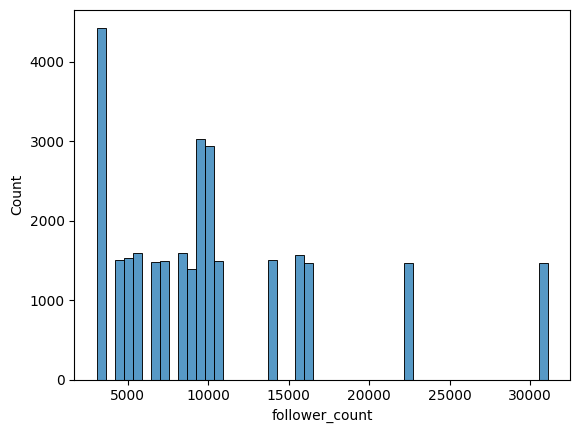

In [7]:
sns.histplot(data=ig['follower_count'], bins=50)

### Q2. Followers vs followers gained (scatter plot)


<Axes: xlabel='follower_count', ylabel='followers_gained'>

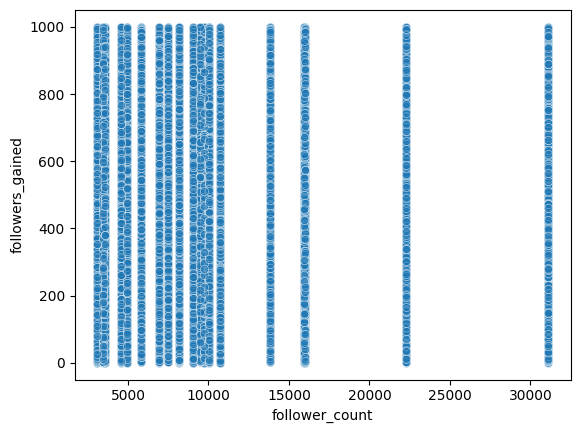

In [10]:
sns.scatterplot(data=ig, x='follower_count', y='followers_gained', alpha=0.6)

### Q3. Engagement rate distribution by account type


<Axes: xlabel='account_type', ylabel='engagement_rate'>

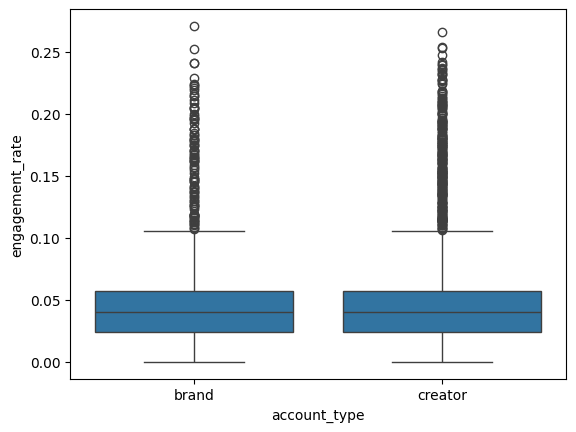

In [11]:
sns.boxplot(data=ig, x='account_type', y='engagement_rate')

### Q4. Followers gained by account type (bar plot)


<Axes: xlabel='account_type', ylabel='followers_gained'>

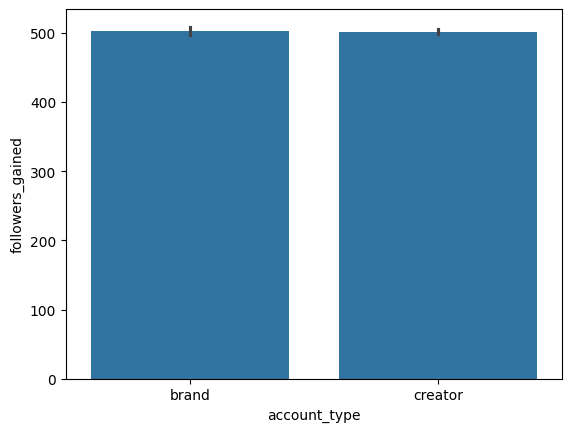

In [13]:
sns.barplot(data=ig, y='followers_gained', x='account_type')

### Q5. Engagement rate vs follower count (log scale)


<Axes: xlabel='follower_count', ylabel='engagement_rate'>

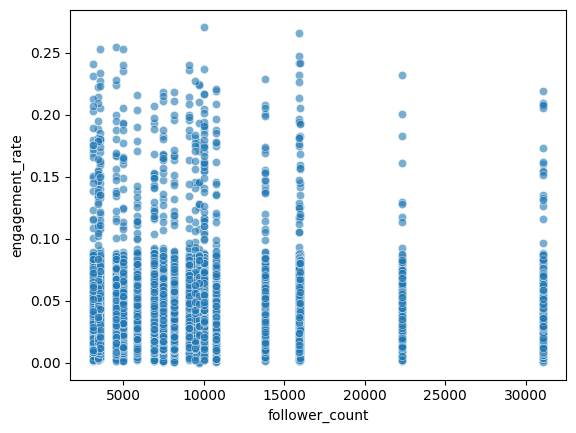

In [20]:
sns.scatterplot(data=ig, x='follower_count', y='engagement_rate', alpha=0.6)

### Q6. Account size (small/medium/large) vs engagement rate


In [24]:
ig['account_size'] = pd.cut(ig['follower_count'], bins=[0,7000, 15000, 35000], labels=['Small','Medium','Large'])

<Axes: xlabel='account_size', ylabel='engagement_rate'>

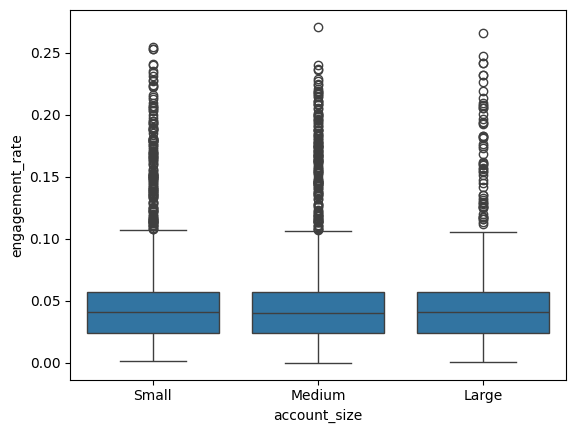

In [25]:
sns.boxplot(data=ig, x='account_size', y='engagement_rate')

### Q7. Account type contribution to high-performing posts


<Axes: xlabel='account_type', ylabel='count'>

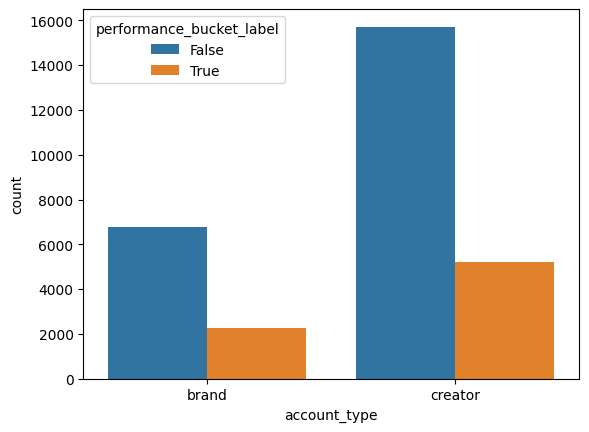

In [27]:
sns.countplot(data=ig, x='account_type', hue=ig['performance_bucket_label']=='viral')

### Q8. Followers gained distribution for high vs low performance posts


<Axes: xlabel='performance_bucket_label', ylabel='followers_gained'>

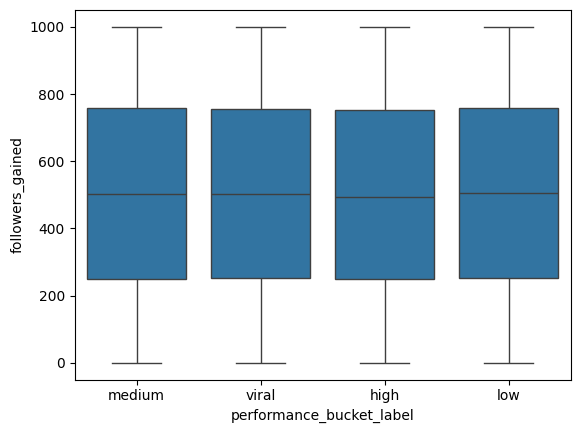

In [28]:
sns.boxplot(data=ig, x='performance_bucket_label', y='followers_gained')

### Q9. Average engagement rate by account type


<Axes: xlabel='account_type', ylabel='engagement_rate'>

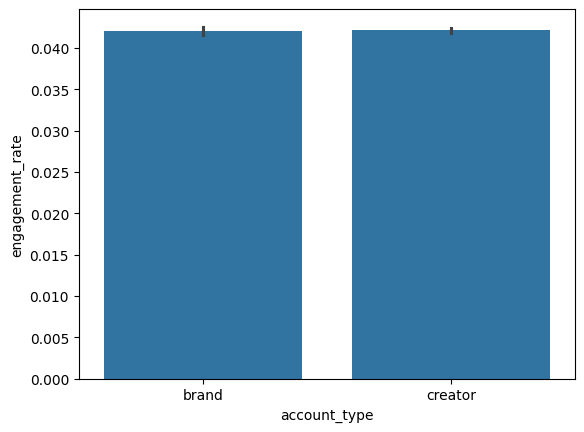

In [29]:
sns.barplot(data=ig, x='account_type', y='engagement_rate', estimator='mean')

### Q10. Reach distribution across account types


<Axes: xlabel='account_type', ylabel='reach'>

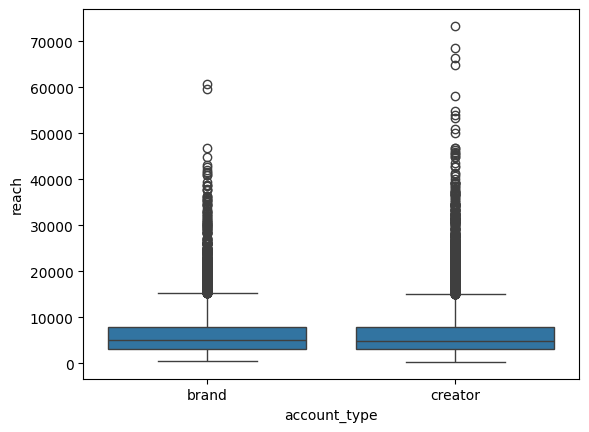

In [31]:
sns.boxplot(data=ig, x='account_type', y='reach')

## B. MEDIA TYPE & FORMAT VISUALS


### Q11. Number of posts by media type


<Axes: xlabel='media_type', ylabel='count'>

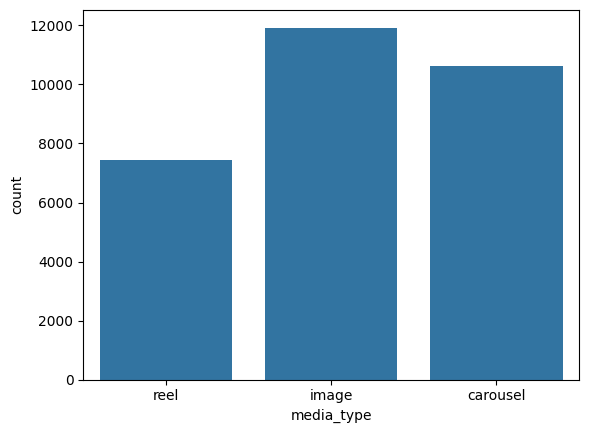

In [32]:
sns.countplot(data=ig, x='media_type')

### Q12. Engagement rate by media type (boxplot)


<Axes: xlabel='media_type', ylabel='engagement_rate'>

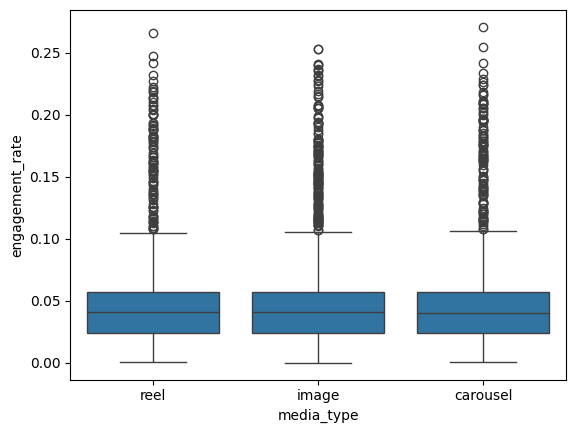

In [34]:
sns.boxplot(data=ig, x='media_type', y='engagement_rate')

### Q13. Reach by media type


<Axes: xlabel='media_type', ylabel='reach'>

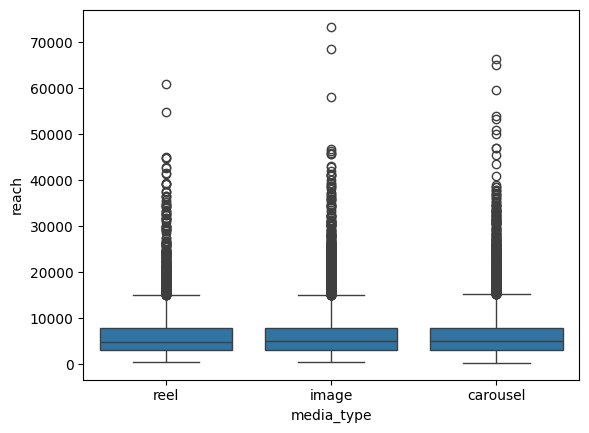

In [37]:
sns.boxplot(data=ig, x='media_type', y='reach')

### Q14. Followers gained by media type


<Axes: xlabel='media_type', ylabel='followers_gained'>

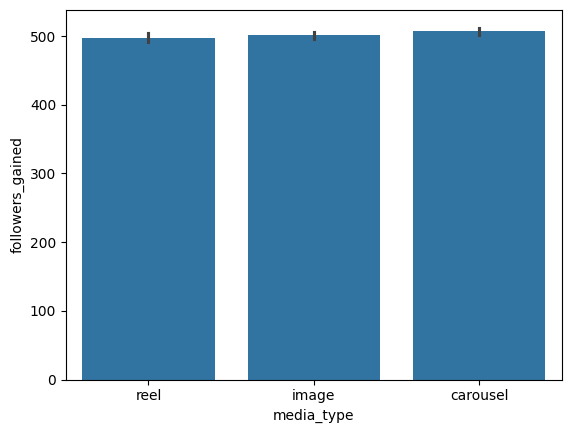

In [36]:
sns.barplot(data=ig, x='media_type', y='followers_gained')

### Q15. Saves vs likes by media type


<Axes: xlabel='saves', ylabel='likes'>

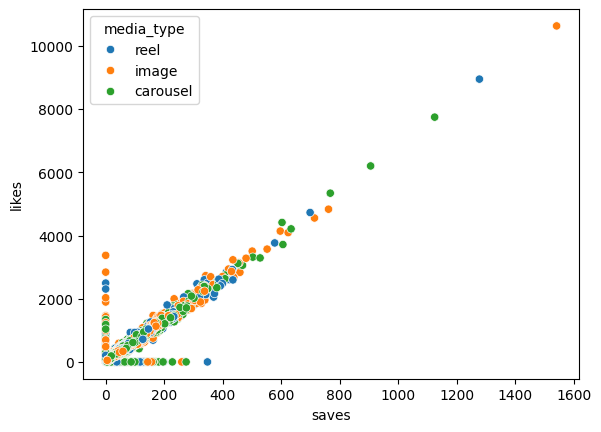

In [38]:
sns.scatterplot(data=ig, x='saves', y='likes', hue='media_type')

### Q16. Shares vs comments by media type


<Axes: xlabel='shares', ylabel='comments'>

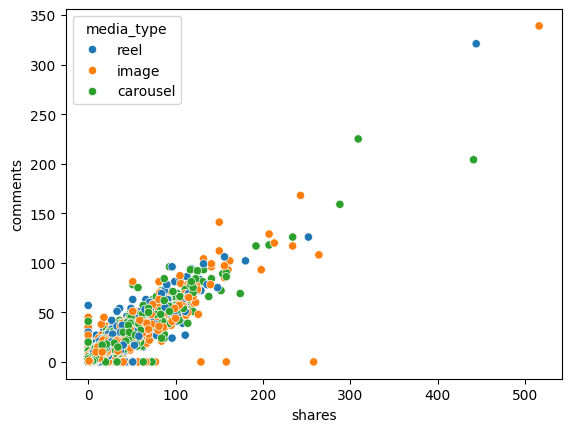

In [39]:
sns.scatterplot(data=ig, x='shares', y='comments', hue='media_type')

### Q17. Media type contribution to high-performance bucket


<Axes: xlabel='media_type', ylabel='count'>

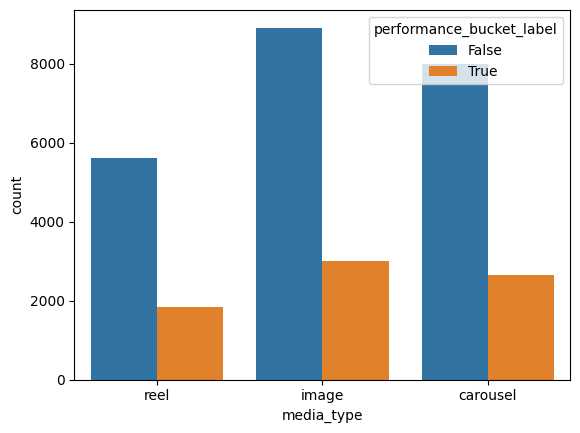

In [40]:
sns.countplot(data=ig, x='media_type', hue=ig['performance_bucket_label']=='viral')

### Q18. Reach vs engagement rate by media type


<Axes: xlabel='reach', ylabel='engagement_rate'>

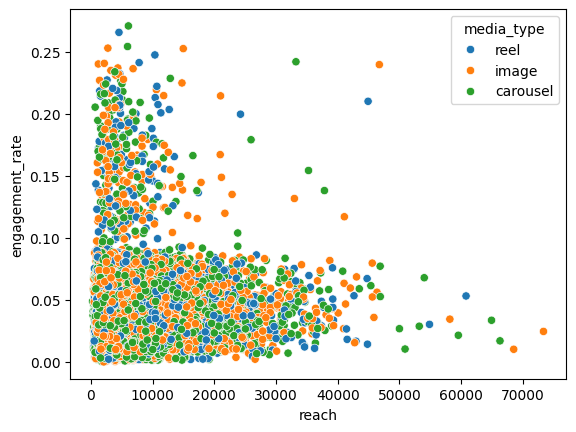

In [42]:
sns.scatterplot(data=ig, x='reach', y='engagement_rate', hue='media_type')

### Q19. Media type vs impressions


<Axes: xlabel='media_type', ylabel='impressions'>

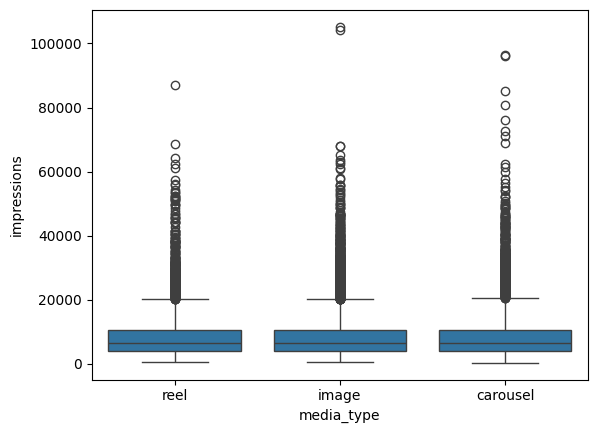

In [45]:
sns.boxplot(data=ig, x='media_type', y='impressions')

### Q20. Engagement efficiency (engagement_rate / reach) by media type


In [4]:
ig['engg_eff'] = ig['engagement_rate'] / ig['reach']

<Axes: xlabel='media_type', ylabel='engg_eff'>

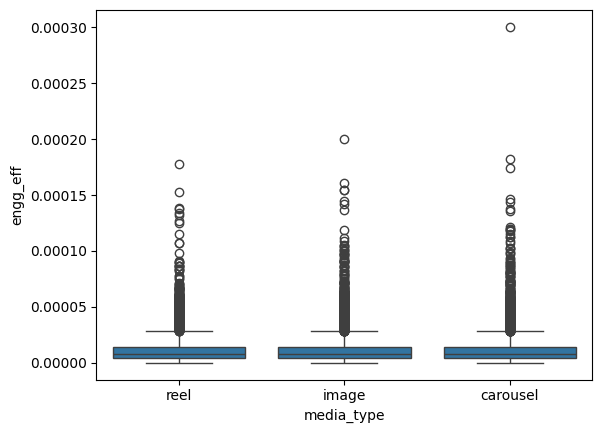

In [5]:
sns.boxplot(data=ig, x='media_type', y='engg_eff')

## C. CONTENT CATEGORY VISUALS


### Q21. Distribution of posts by content category


<Axes: xlabel='count', ylabel='content_category'>

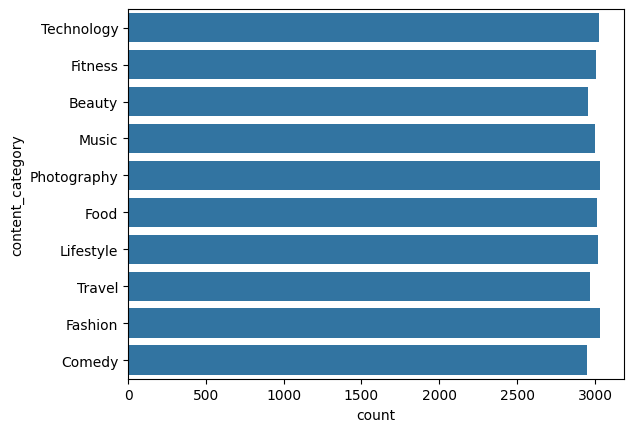

In [50]:
sns.countplot(data=ig, y='content_category')

### Q22. Engagement rate by content category


<Axes: xlabel='engagement_rate', ylabel='content_category'>

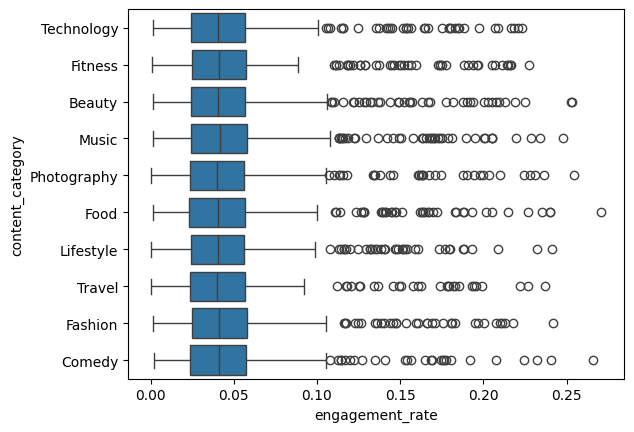

In [52]:
sns.boxplot(data=ig, y='content_category', x='engagement_rate')

### Q23. Reach by content category


<Axes: xlabel='reach', ylabel='content_category'>

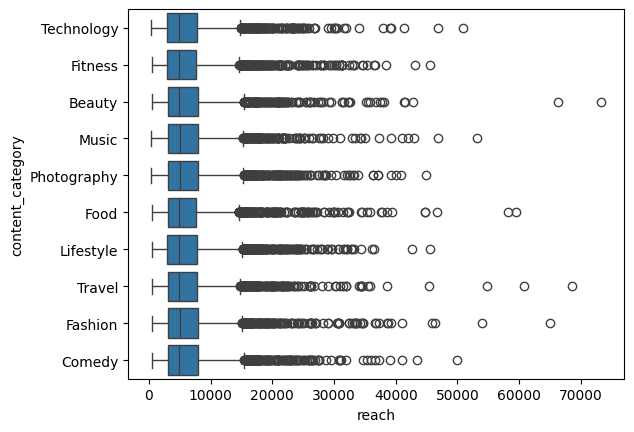

In [53]:
sns.boxplot(data=ig, y='content_category', x='reach')

### Q24. Followers gained by content category


<Axes: xlabel='followers_gained', ylabel='content_category'>

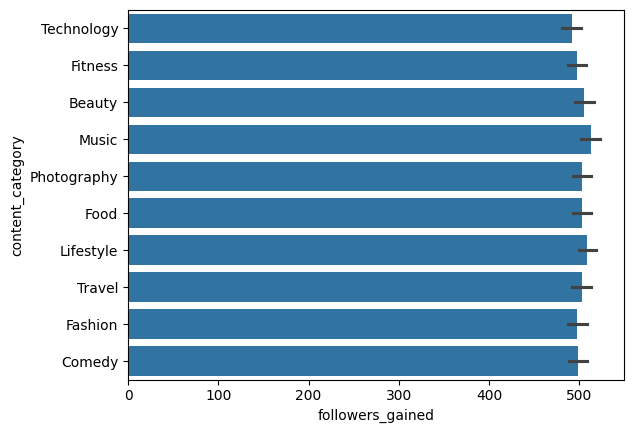

In [55]:
sns.barplot(data=ig, y='content_category', x='followers_gained')

### Q25. Saves-to-likes ratio by content category


In [56]:
ig['stl'] = ig['saves'] / ig['likes']

<Axes: xlabel='stl', ylabel='content_category'>

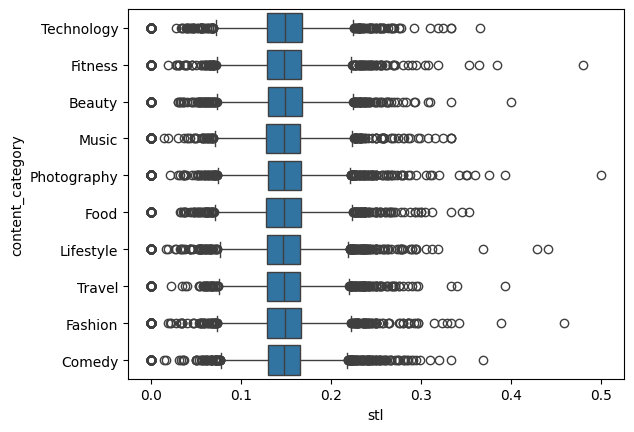

In [57]:
sns.boxplot(data=ig, y='content_category', x='stl')

### Q26. High-performing post share by content category


<Axes: xlabel='count', ylabel='content_category'>

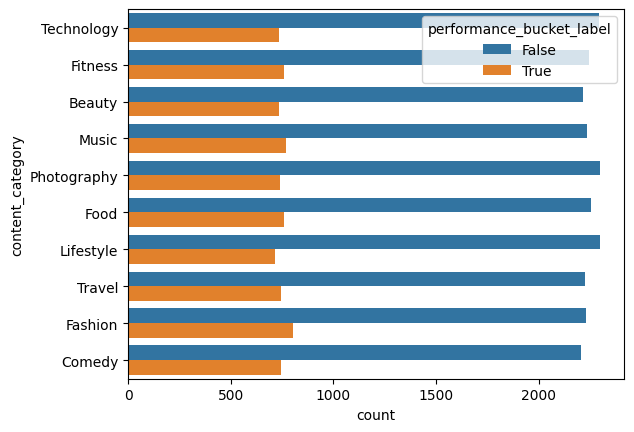

In [61]:
sns.countplot(data=ig, y='content_category', hue=ig['performance_bucket_label']=='viral')

### Q27. Engagement rate distribution across categories (violin plot)


<Axes: xlabel='engagement_rate', ylabel='content_category'>

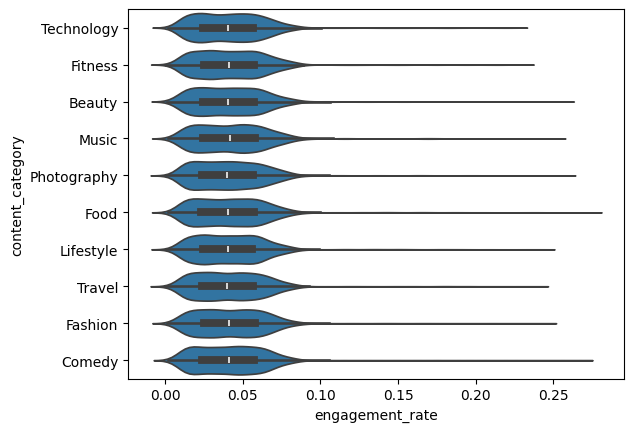

In [63]:
sns.violinplot(data=ig, x='engagement_rate', y='content_category')

### Q28. Category-wise performance bucket comparison


<Axes: xlabel='count', ylabel='content_category'>

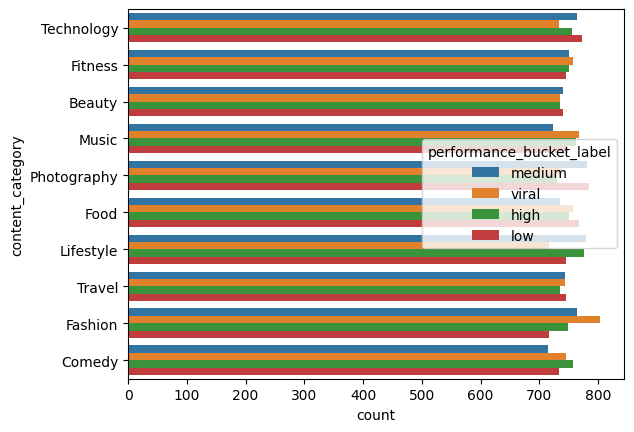

In [64]:
sns.countplot(data=ig, y='content_category', hue='performance_bucket_label')

### Q29. Category vs media type heatmap


In [65]:
pivot = pd.crosstab(ig['content_category'], ig['media_type'])

<Axes: xlabel='media_type', ylabel='content_category'>

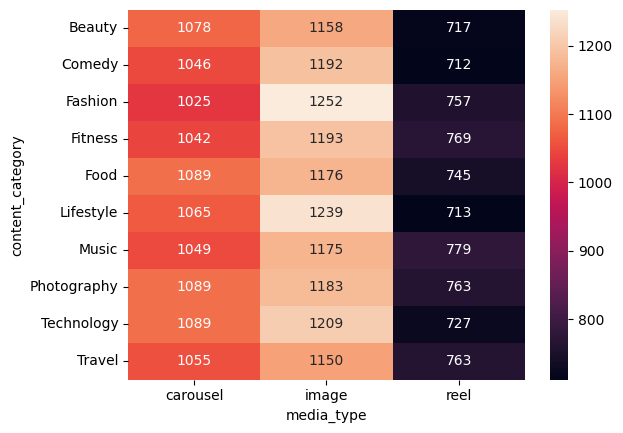

In [67]:
sns.heatmap(data=pivot, annot=True, fmt='d')

### Q30. Content category vs traffic source heatmap


In [68]:
pivot = pd.crosstab(ig['content_category'], ig['traffic_source'])

<Axes: xlabel='traffic_source', ylabel='content_category'>

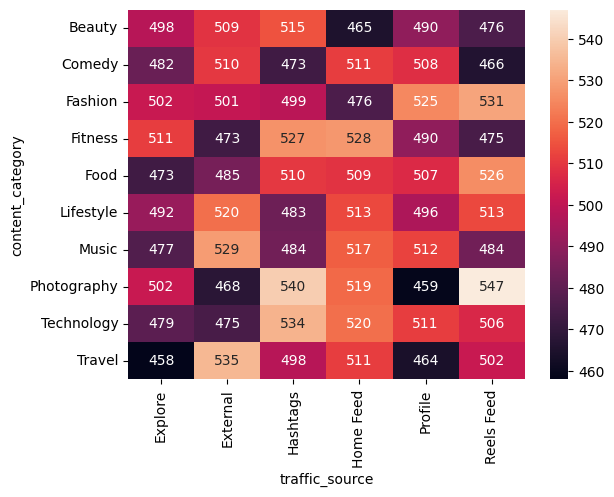

In [69]:
sns.heatmap(data=pivot, annot=True, fmt='d')

## D. TRAFFIC SOURCE VISUALS


### Q31. Reach by traffic source


<Axes: xlabel='traffic_source', ylabel='reach'>

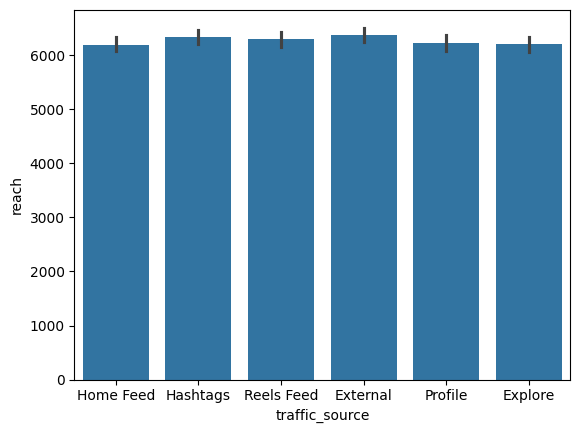

In [70]:
sns.barplot(data=ig, x='traffic_source', y='reach')

### Q32. Engagement rate by traffic source


<Axes: xlabel='traffic_source', ylabel='engagement_rate'>

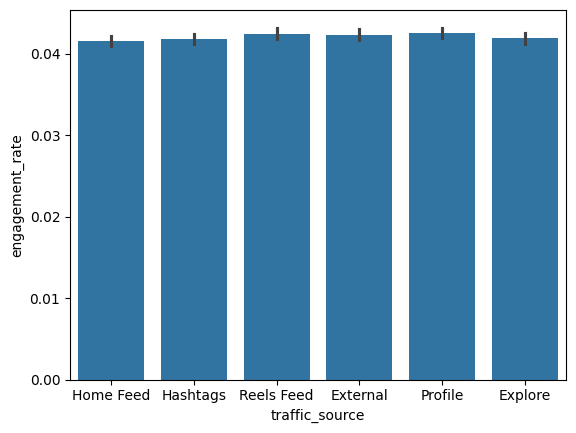

In [71]:
sns.barplot(data=ig, x='traffic_source', y='engagement_rate')

### Q33. Followers gained by traffic source


<Axes: xlabel='traffic_source', ylabel='followers_gained'>

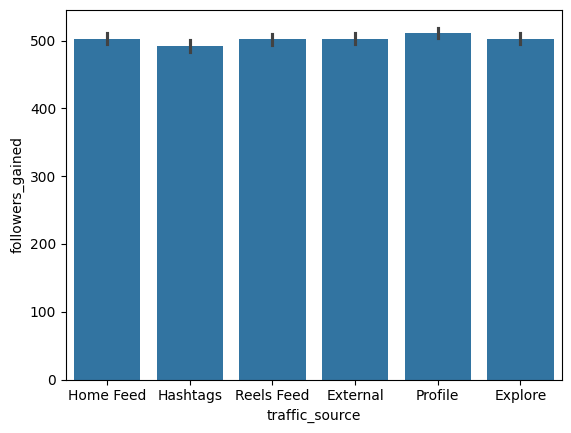

In [72]:
sns.barplot(data=ig, x='traffic_source', y='followers_gained')

### Q34. Saves & shares by traffic source


In [73]:
ig_melt = ig.melt(id_vars='traffic_source', value_vars=['saves','shares'])

<Axes: xlabel='traffic_source', ylabel='value'>

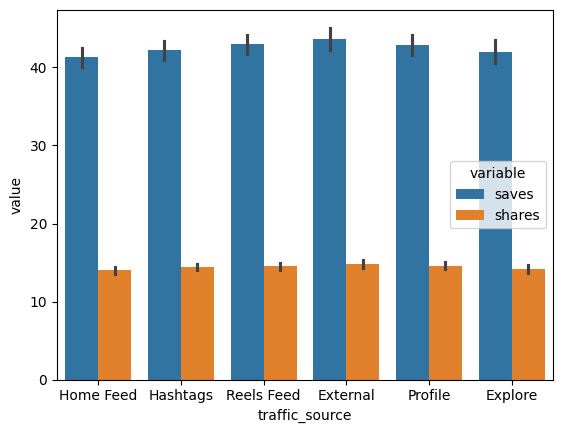

In [74]:
sns.barplot(data=ig_melt, x='traffic_source', y='value', hue='variable')

<Axes: xlabel='saves', ylabel='shares'>

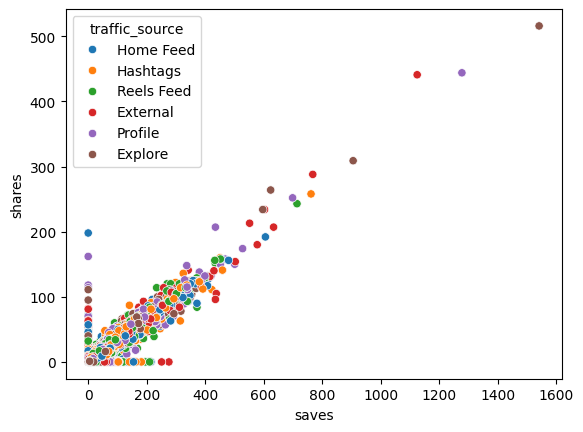

In [75]:
sns.scatterplot(data=ig, x='saves', y='shares', hue='traffic_source')

### Q35. Traffic source contribution to high-performing posts


<Axes: xlabel='traffic_source', ylabel='count'>

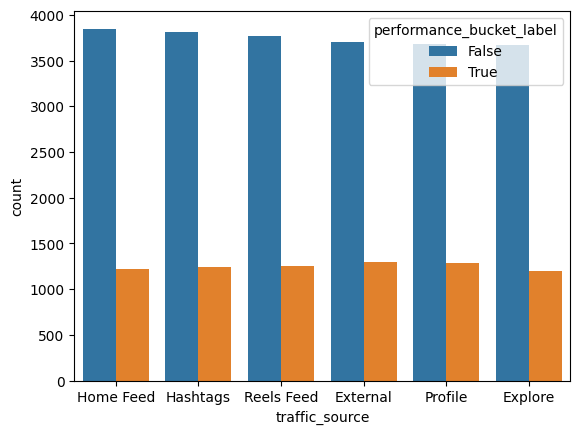

In [76]:
sns.countplot(data=ig, x='traffic_source', hue=ig['performance_bucket_label']=='viral')

### Q36. Reach vs impressions by traffic source


<Axes: xlabel='reach', ylabel='impressions'>

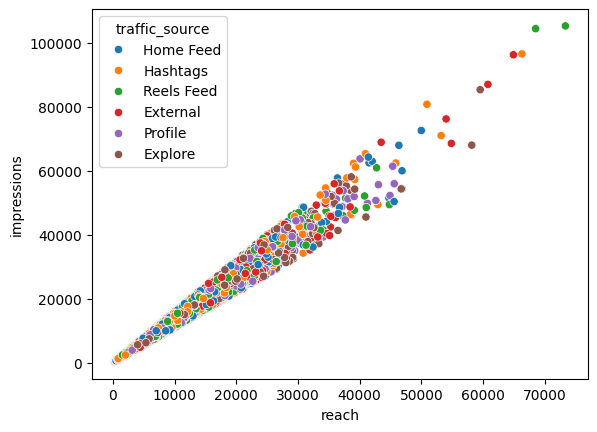

In [77]:
sns.scatterplot(data=ig, x='reach', y='impressions', hue='traffic_source')

### Q37. Engagement efficiency by traffic source


<Axes: xlabel='traffic_source', ylabel='engg_eff'>

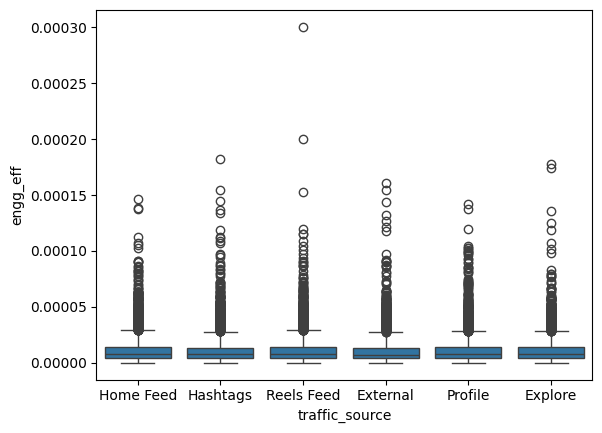

In [79]:
sns.boxplot(data=ig, x='traffic_source', y='engg_eff')

### Q38. Traffic source vs media type heatmap


In [80]:
pivot = pd.crosstab(ig['traffic_source'], ig['media_type'])

<Axes: xlabel='media_type', ylabel='traffic_source'>

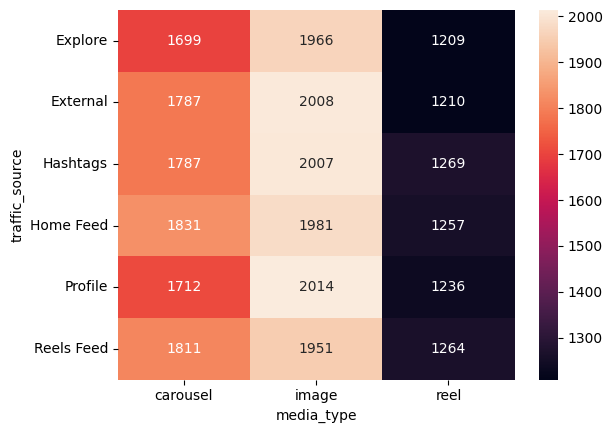

In [81]:
sns.heatmap(pivot, annot=True, fmt='d')

### Q39. Traffic source vs content category heatmap


In [82]:
pivot = pd.crosstab(ig['traffic_source'], ig['content_category'])

<Axes: xlabel='content_category', ylabel='traffic_source'>

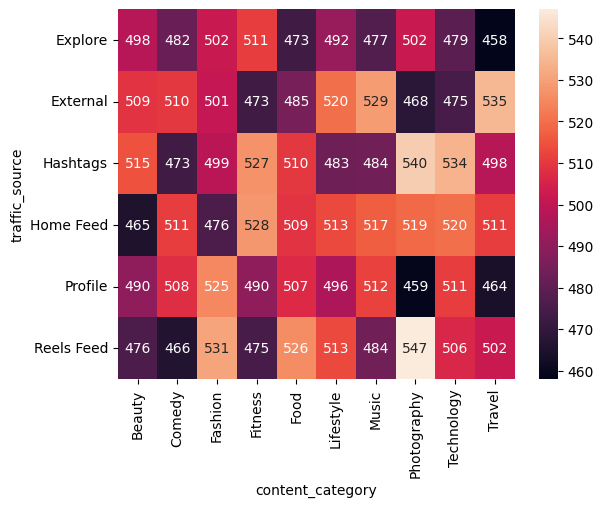

In [83]:
sns.heatmap(pivot, annot=True, fmt='d')

### Q40. Traffic source vs performance bucket stacked bar


<Axes: xlabel='traffic_source', ylabel='count'>

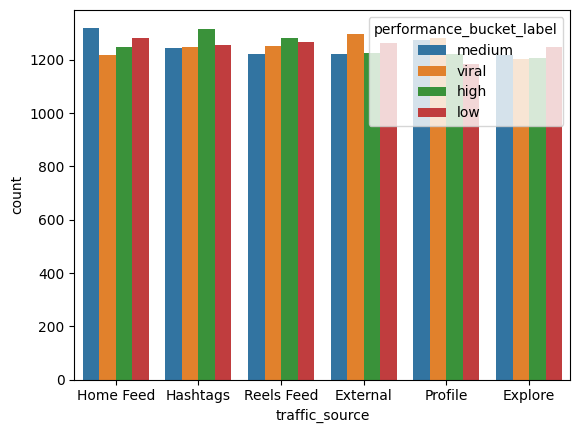

In [84]:
sns.countplot(data=ig, x='traffic_source', hue='performance_bucket_label')

## E. CTA (CALL-TO-ACTION) VISUALS


### Q41. Engagement rate: CTA vs no CTA


<Axes: xlabel='has_call_to_action', ylabel='engagement_rate'>

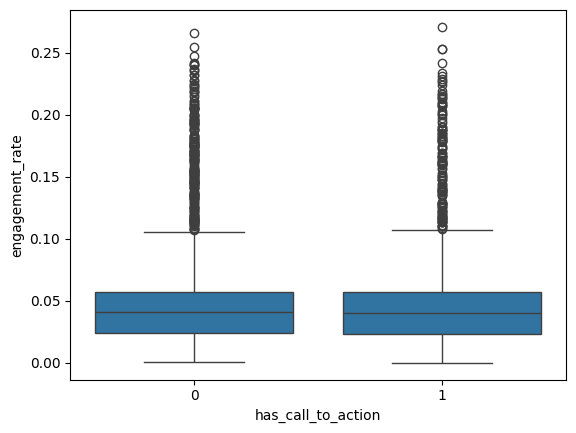

In [85]:
sns.boxplot(data=ig, x='has_call_to_action', y='engagement_rate')

### Q42. Followers gained: CTA vs no CTA


<Axes: xlabel='has_call_to_action', ylabel='followers_gained'>

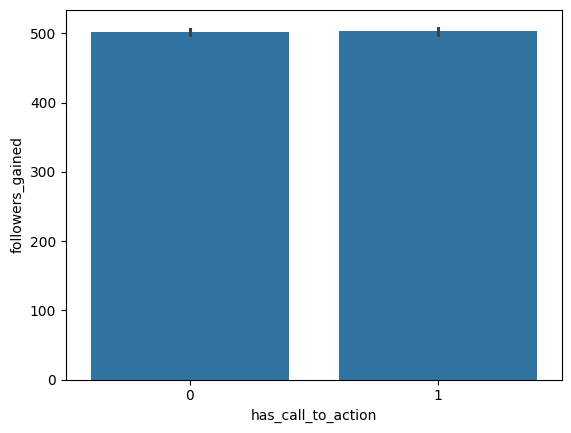

In [87]:
sns.barplot(data=ig, x='has_call_to_action', y='followers_gained')

### Q43. Comments distribution with vs without CTA


<Axes: xlabel='has_call_to_action', ylabel='comments'>

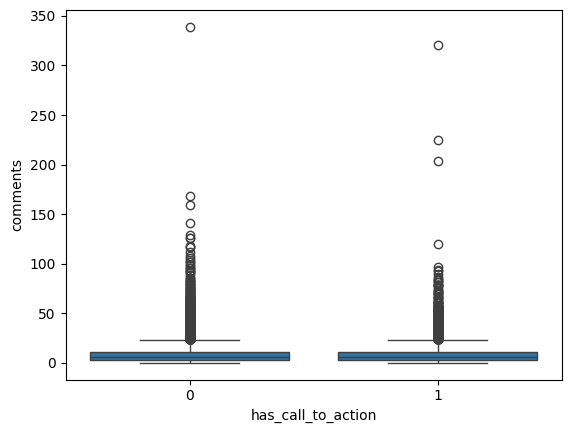

In [90]:
sns.boxplot(data=ig, x='has_call_to_action', y='comments')

### Q44. Saves & shares with vs without CTA


In [91]:
ig_melt = ig.melt(id_vars='has_call_to_action', value_vars=['saves','shares'])

<Axes: xlabel='has_call_to_action', ylabel='value'>

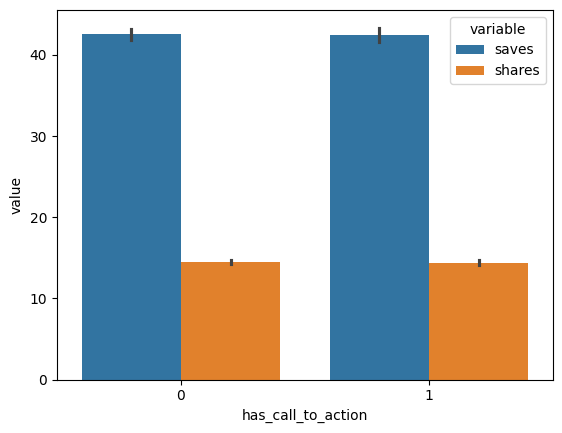

In [93]:
sns.barplot(data=ig_melt, x='has_call_to_action', y='value', hue='variable')

### Q45. CTA impact on performance bucket distribution


<Axes: xlabel='has_call_to_action', ylabel='count'>

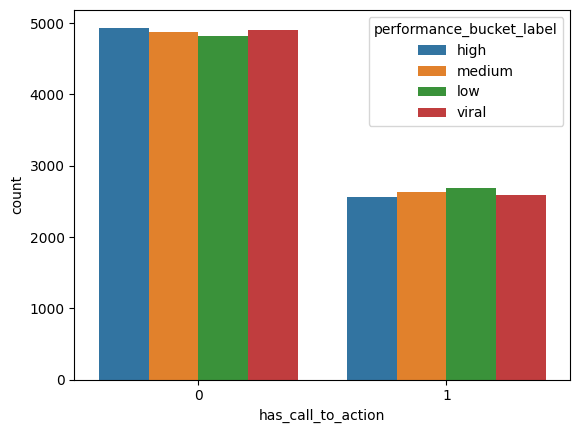

In [94]:
sns.countplot(data=ig, x='has_call_to_action', hue='performance_bucket_label')

### Q46. CTA effectiveness by media type


<Axes: xlabel='engagement_rate', ylabel='media_type'>

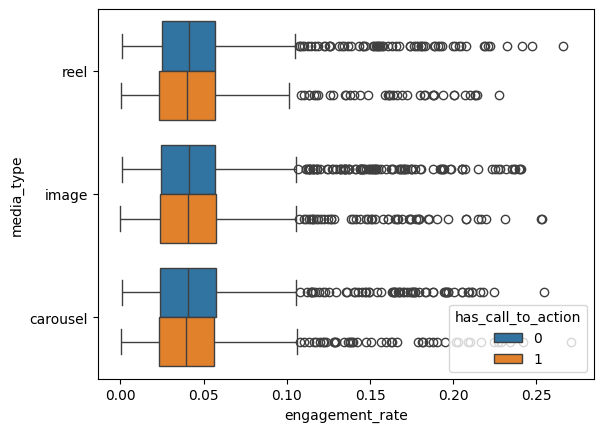

In [96]:
sns.boxplot(data=ig, x='engagement_rate', hue='has_call_to_action', y='media_type')

### Q47. CTA effectiveness by content category


<Axes: xlabel='engagement_rate', ylabel='content_category'>

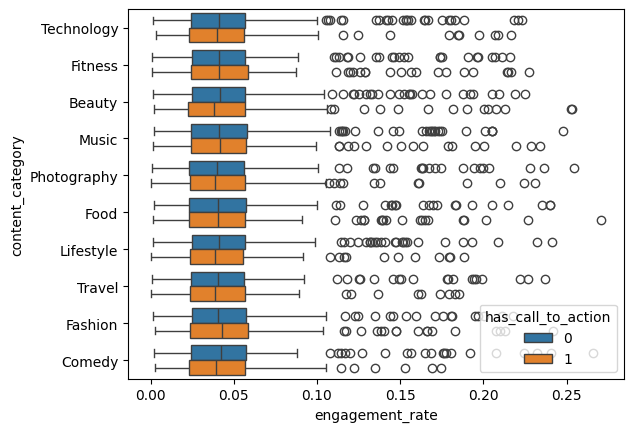

In [97]:
sns.boxplot(data=ig, x='engagement_rate', hue='has_call_to_action', y='content_category')

### Q48. CTA vs caption length relationship


<Axes: xlabel='has_call_to_action', ylabel='caption_length'>

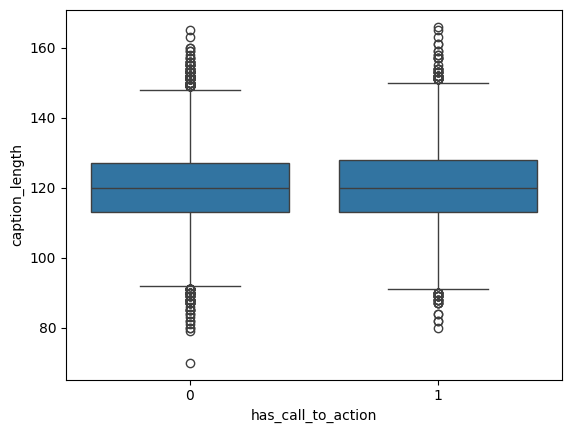

In [98]:
sns.boxplot(data=ig, x='has_call_to_action', y='caption_length')

### Q49. CTA vs engagement rate scatter


<Axes: xlabel='engagement_rate', ylabel='caption_length'>

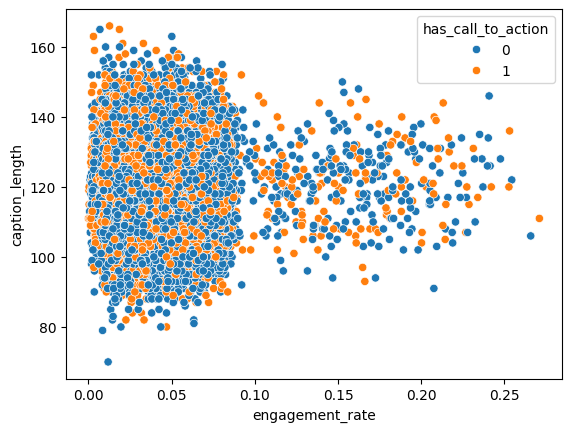

In [105]:
sns.scatterplot(data=ig, x='engagement_rate', hue='has_call_to_action', y='caption_length')

### Q50. CTA vs followers gained scatter


<Axes: xlabel='followers_gained', ylabel='caption_length'>

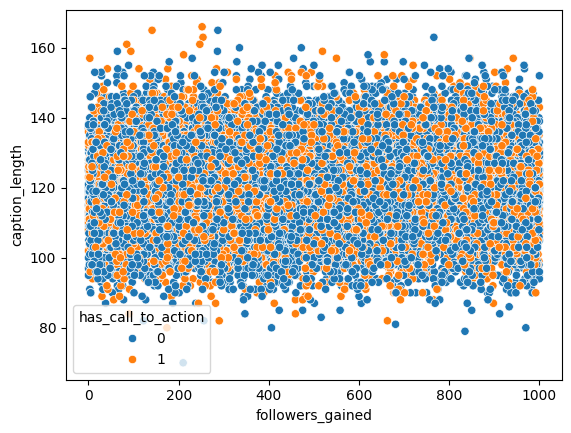

In [104]:
sns.scatterplot(data=ig, x='followers_gained', hue='has_call_to_action', y='caption_length')

## F. POST TIMING VISUALS


### Q51. Engagement rate by post hour


<Axes: xlabel='post_hour', ylabel='engagement_rate'>

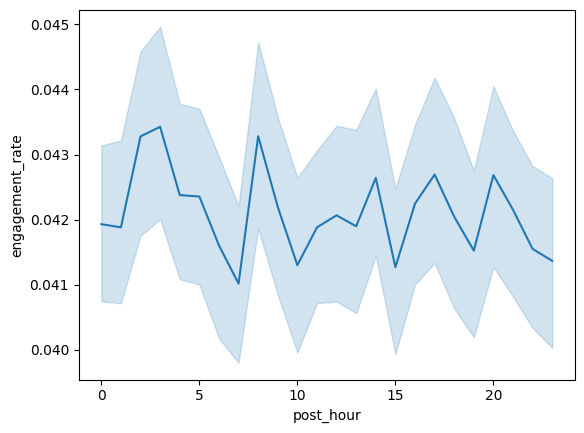

In [110]:
sns.lineplot(data=ig, y='engagement_rate', x='post_hour')

### Q52. Reach by post hour


<Axes: xlabel='post_hour', ylabel='reach'>

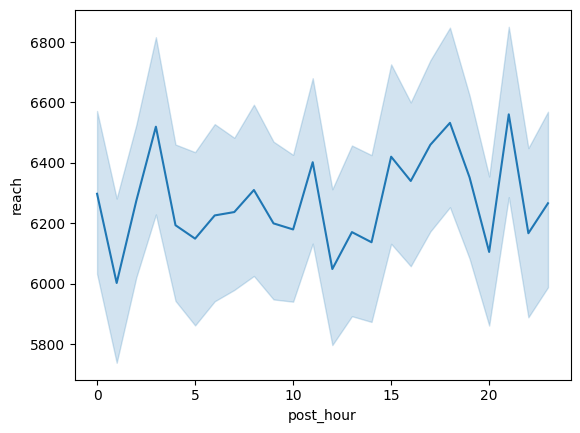

In [111]:
sns.lineplot(data=ig, y='reach', x='post_hour')

### Q53. Followers gained by post hour


<Axes: xlabel='post_hour', ylabel='followers_gained'>

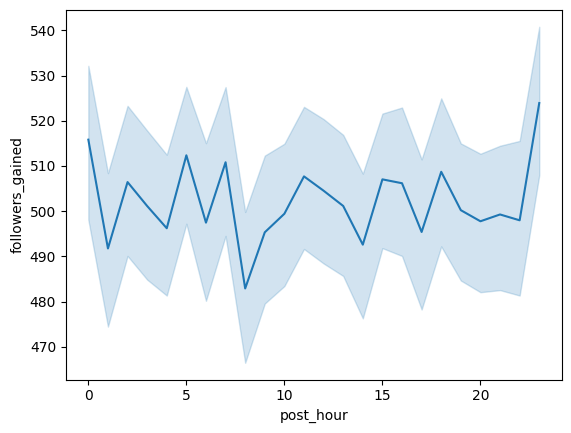

In [112]:
sns.lineplot(data=ig, y='followers_gained', x='post_hour')

### Q54. Engagement rate by day of week


<Axes: xlabel='day_of_week', ylabel='engagement_rate'>

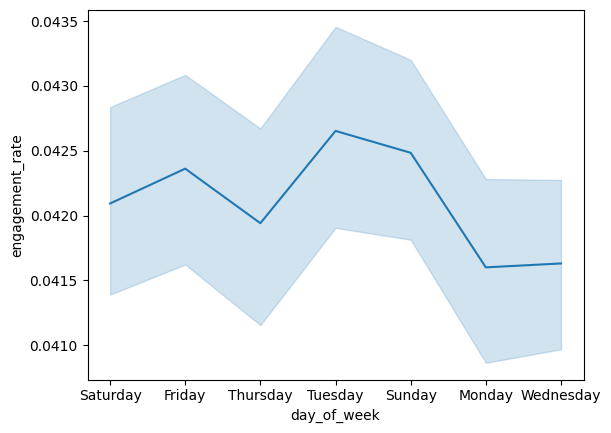

In [113]:
sns.lineplot(data=ig, y='engagement_rate', x='day_of_week')

### Q55. Reach by day of week


<Axes: xlabel='day_of_week', ylabel='reach'>

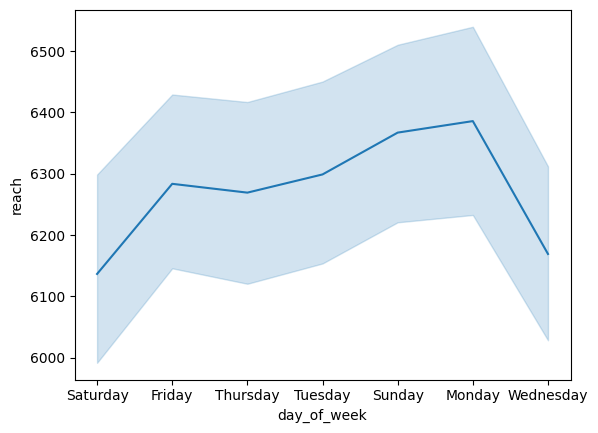

In [114]:
sns.lineplot(data=ig, y='reach', x='day_of_week')

### Q56. Heatmap of day of week vs post hour (engagement rate)


In [115]:
pivot = ig.pivot_table(values='engagement_rate', index='day_of_week', columns='post_hour')

<Axes: xlabel='post_hour', ylabel='day_of_week'>

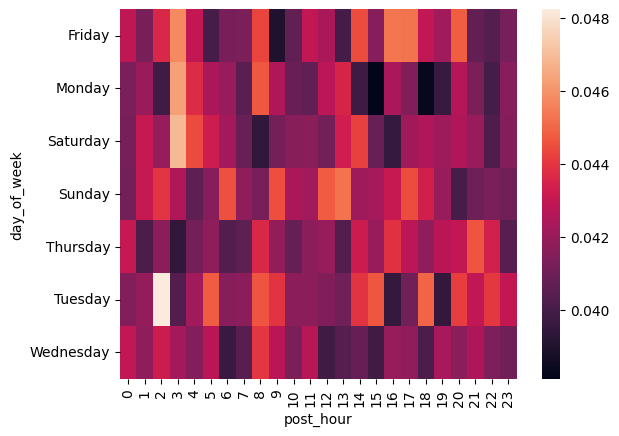

In [116]:
sns.heatmap(pivot)

### Q57. High-performing posts by posting hour


<Axes: xlabel='post_hour', ylabel='count'>

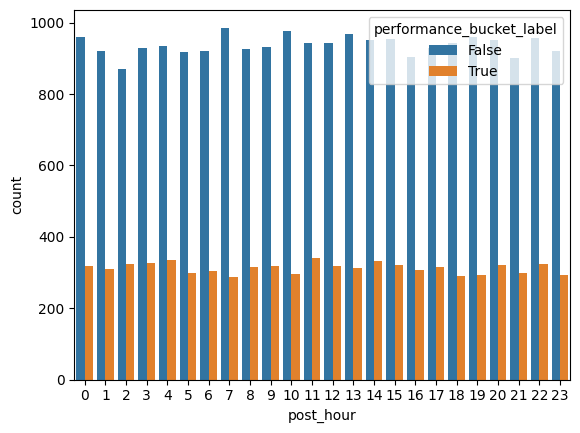

In [118]:
sns.countplot(data=ig, x='post_hour', hue=ig['performance_bucket_label']=='viral')

### Q58. Weekend vs weekday engagement comparison


<Axes: xlabel='weekend', ylabel='engagement_rate'>

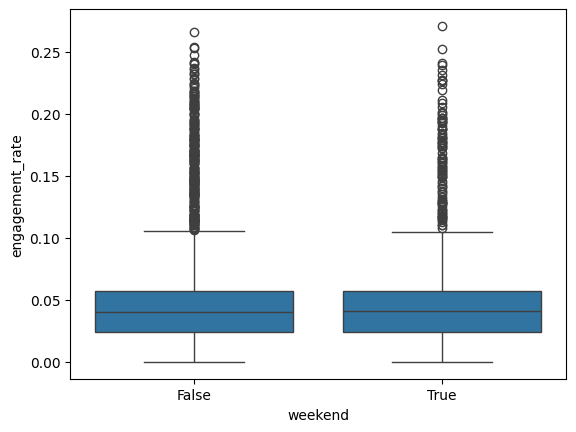

In [120]:
ig['weekend'] = ig['day_of_week'].isin(['Saturday','Sunday'])
sns.boxplot(data=ig, y='engagement_rate', x='weekend')

### Q59. Saves by post hour


<Axes: xlabel='post_hour', ylabel='saves'>

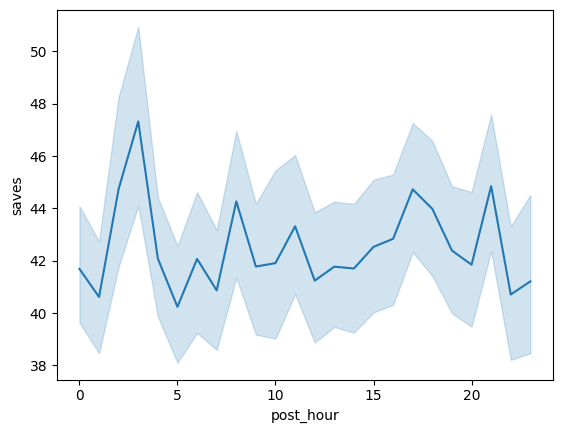

In [121]:
sns.lineplot(data=ig, y='saves', x='post_hour')

### Q60. Shares by post hour


<Axes: xlabel='post_hour', ylabel='reach'>

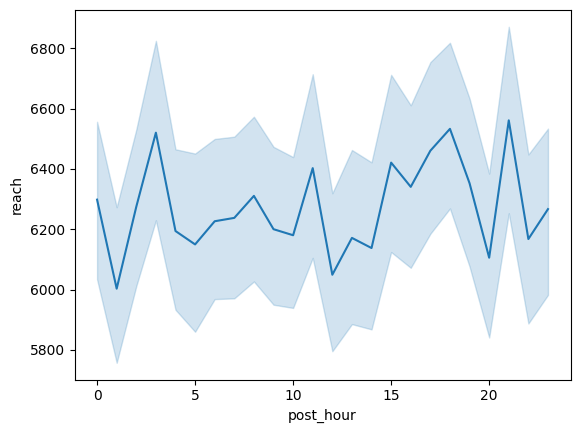

In [122]:
sns.lineplot(data=ig, y='reach', x='post_hour')

## G. CAPTION & HASHTAG VISUALS


### Q61. Caption length distribution


<Axes: xlabel='caption_length', ylabel='Count'>

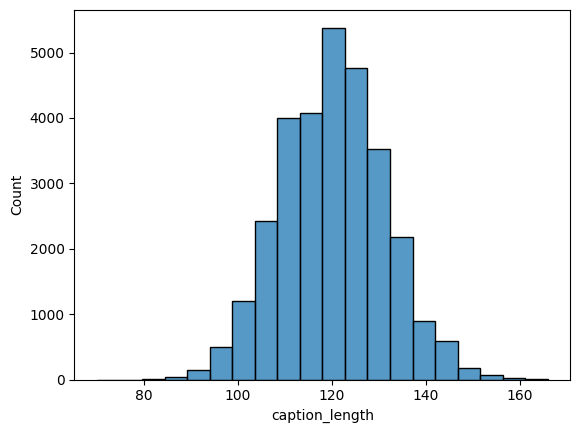

In [125]:
sns.histplot(ig['caption_length'], bins=20)

### Q62. Caption length vs engagement rate


<Axes: xlabel='caption_length', ylabel='engagement_rate'>

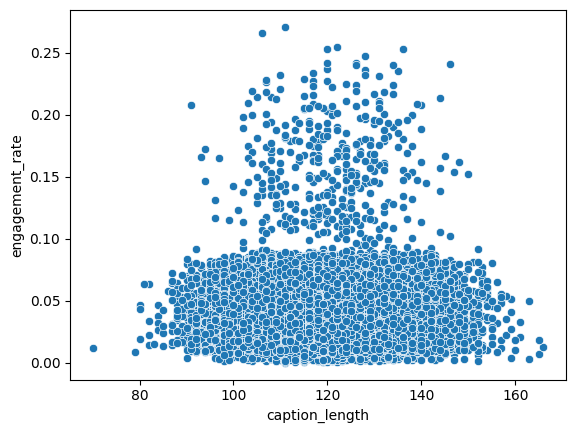

In [126]:
sns.scatterplot(data=ig, x='caption_length', y='engagement_rate')

### Q63. Caption length vs comments


<Axes: xlabel='caption_length', ylabel='comments'>

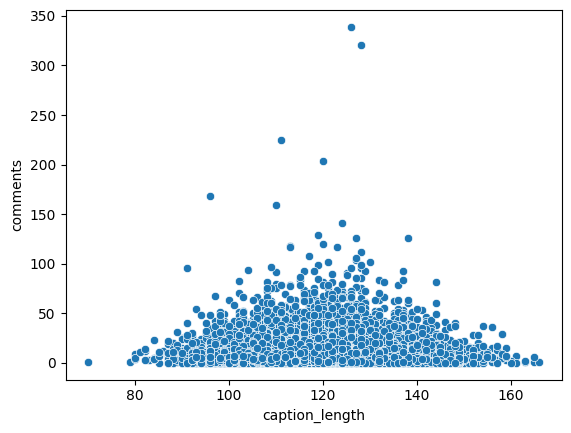

In [127]:
sns.scatterplot(data=ig, x='caption_length', y='comments')

### Q64. Hashtag count distribution


<Axes: xlabel='hashtags_count', ylabel='Count'>

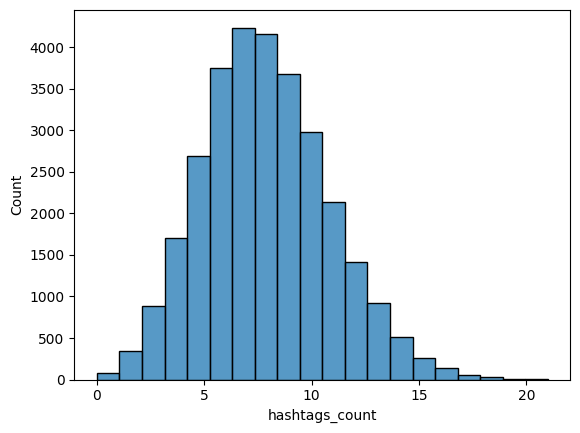

In [129]:
sns.histplot(x=ig['hashtags_count'], bins=20)

### Q65. Hashtag count vs engagement rate


<Axes: xlabel='hashtags_count', ylabel='engagement_rate'>

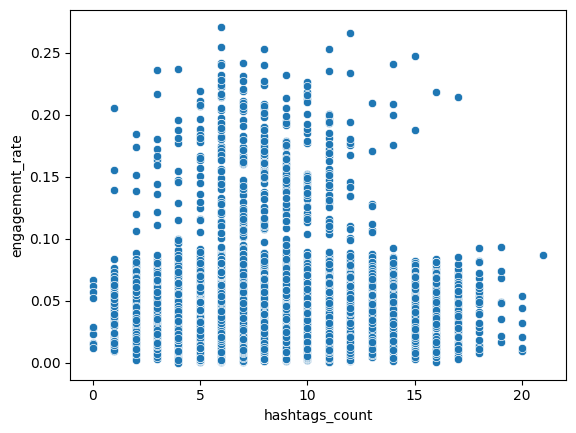

In [130]:
sns.scatterplot(data=ig, x='hashtags_count', y='engagement_rate')

### Q66. Hashtag count vs reach


<Axes: xlabel='hashtags_count', ylabel='reach'>

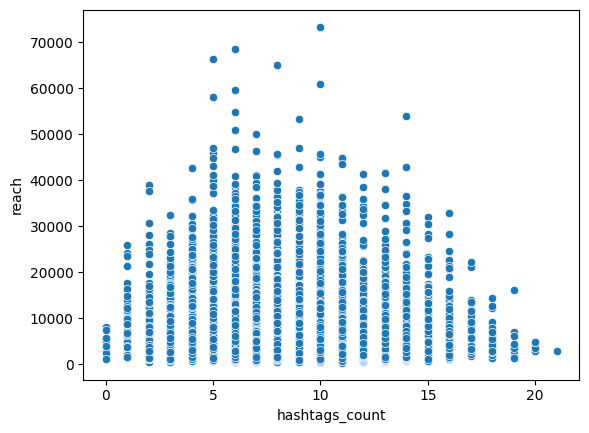

In [131]:
sns.scatterplot(data=ig, x='hashtags_count', y='reach')

### Q67. Hashtag count vs followers gained


<Axes: xlabel='hashtags_count', ylabel='followers_gained'>

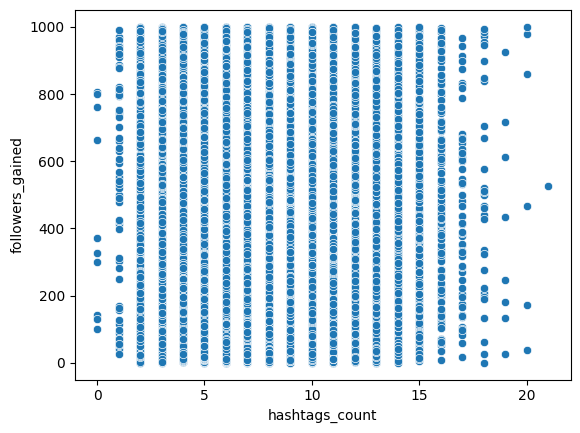

In [132]:
sns.scatterplot(data=ig, x='hashtags_count', y='followers_gained')

### Q68. Engagement rate by hashtag count bins


In [133]:
ig['hashtags_bin'] = pd.cut(ig['hashtags_count'], bins=5)

<Axes: xlabel='hashtags_bin', ylabel='engagement_rate'>

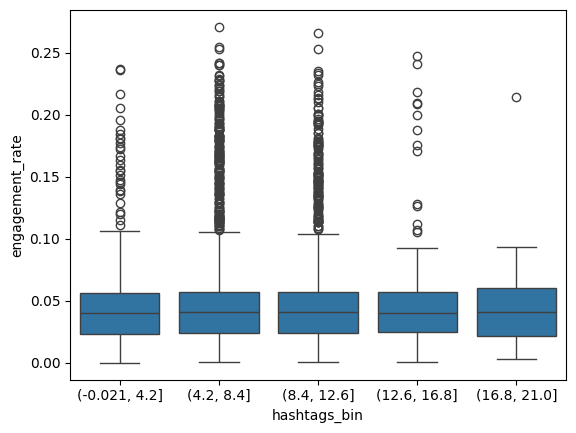

In [134]:
sns.boxplot(data=ig, x='hashtags_bin', y='engagement_rate')

### Q69. Hashtag usage vs performance bucket


<Axes: xlabel='hashtags_count', ylabel='performance_bucket_label'>

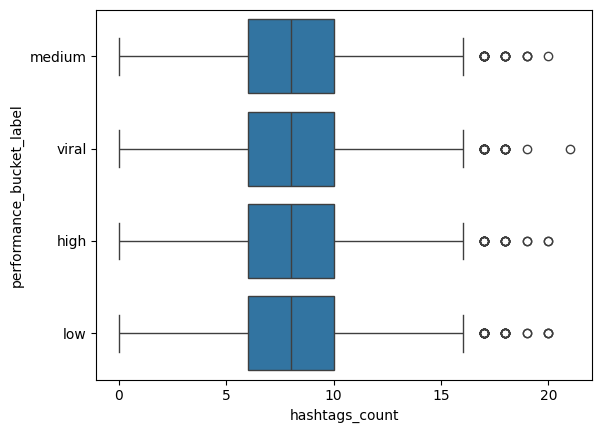

In [135]:
sns.boxplot(data=ig, x='hashtags_count', y='performance_bucket_label')

### Q70. Caption length vs performance bucket


<Axes: xlabel='caption_length', ylabel='performance_bucket_label'>

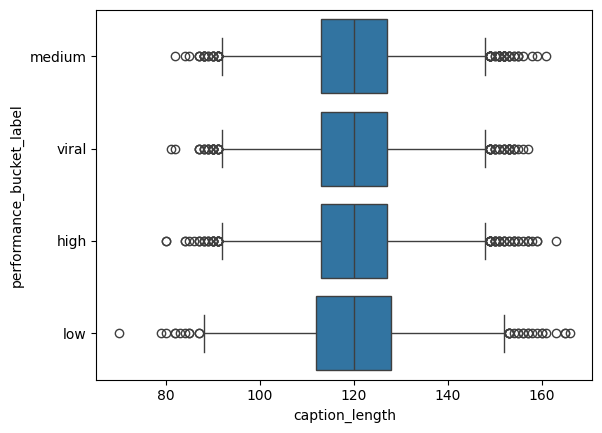

In [136]:
sns.boxplot(data=ig, x='caption_length', y='performance_bucket_label')

## H. PERFORMANCE & VIRALITY VISUALS(Using performance_bucket_label)


### Q71. Distribution of performance buckets


<Axes: xlabel='performance_bucket_label', ylabel='count'>

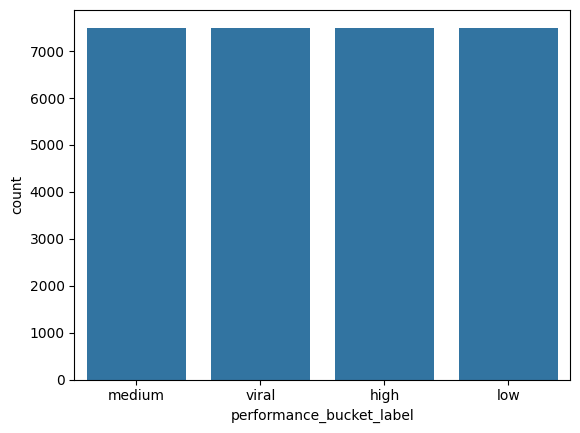

In [137]:
sns.countplot(data=ig, x='performance_bucket_label')

### Q72. Engagement rate by performance bucket


<Axes: xlabel='performance_bucket_label', ylabel='engagement_rate'>

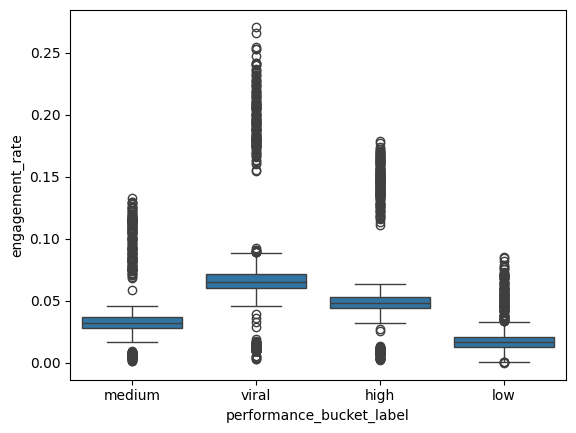

In [138]:
sns.boxplot(data=ig, x='performance_bucket_label', y='engagement_rate')

### Q73. Reach by performance bucket


<Axes: xlabel='performance_bucket_label', ylabel='reach'>

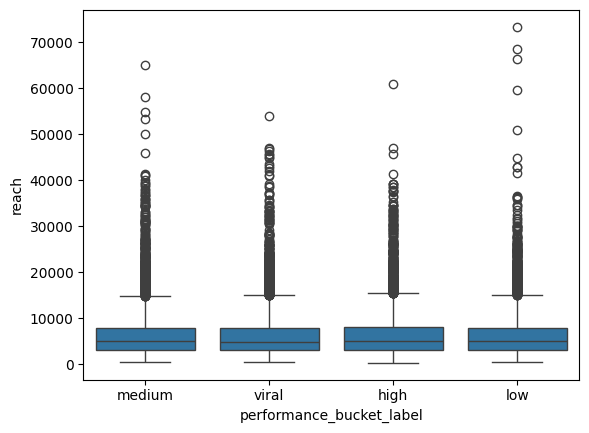

In [139]:
sns.boxplot(data=ig, x='performance_bucket_label', y='reach')

### Q74. Followers gained by performance bucket


<Axes: xlabel='performance_bucket_label', ylabel='followers_gained'>

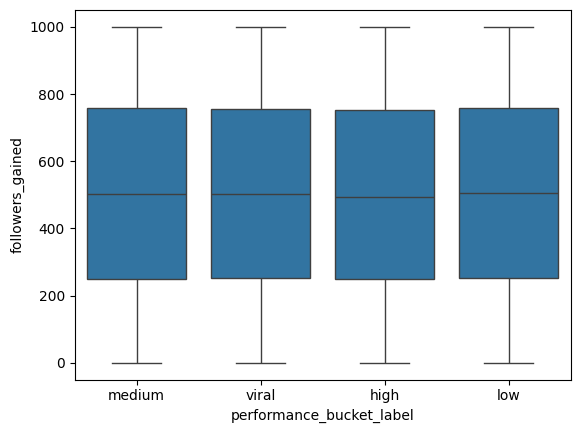

In [140]:
sns.boxplot(data=ig, x='performance_bucket_label', y='followers_gained')

### Q75. Saves & shares by performance bucket


In [141]:
sas = ig.melt(id_vars='performance_bucket_label', value_vars=['saves','shares'])

<Axes: xlabel='performance_bucket_label', ylabel='value'>

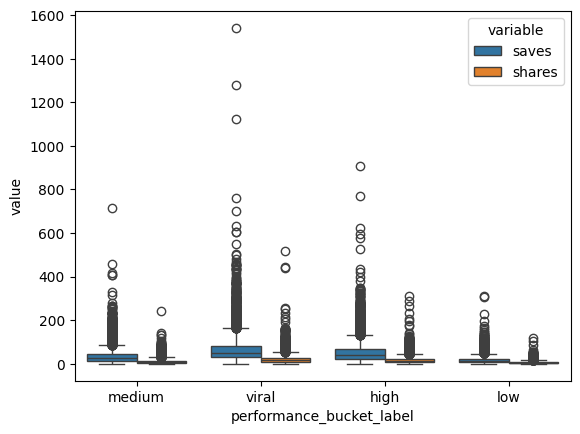

In [143]:
sns.boxplot(data=sas, x='performance_bucket_label', y='value', hue='variable')

### Q76. Media type contribution to high-performing posts


<Axes: xlabel='media_type', ylabel='count'>

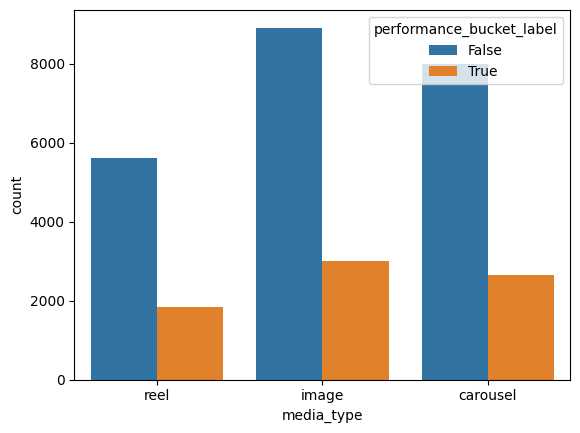

In [144]:
sns.countplot(data=ig, x='media_type', hue=ig['performance_bucket_label']=='viral')

### Q77. Content category contribution to high-performing posts


<Axes: xlabel='content_category', ylabel='count'>

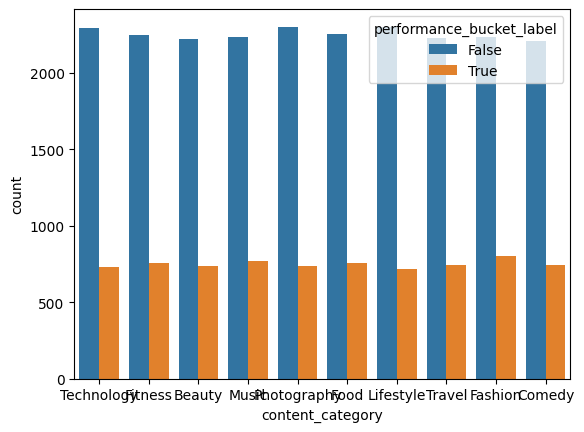

In [145]:
sns.countplot(data=ig, x='content_category', hue=ig['performance_bucket_label']=='viral')

### Q78. Traffic source contribution to high-performing posts


<Axes: xlabel='traffic_source', ylabel='count'>

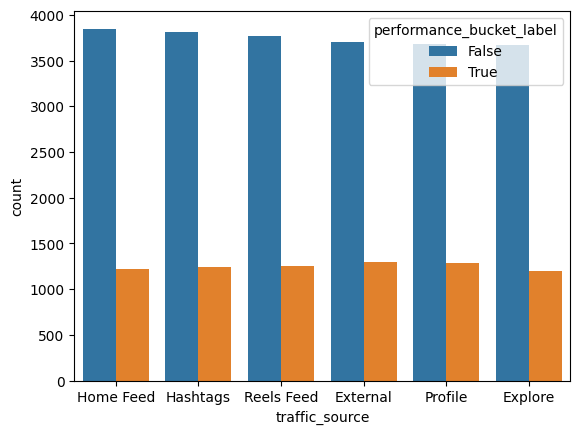

In [146]:
sns.countplot(data=ig, x='traffic_source', hue=ig['performance_bucket_label']=='viral')

### Q79. Engagement efficiency across performance buckets


<Axes: xlabel='engg_eff', ylabel='performance_bucket_label'>

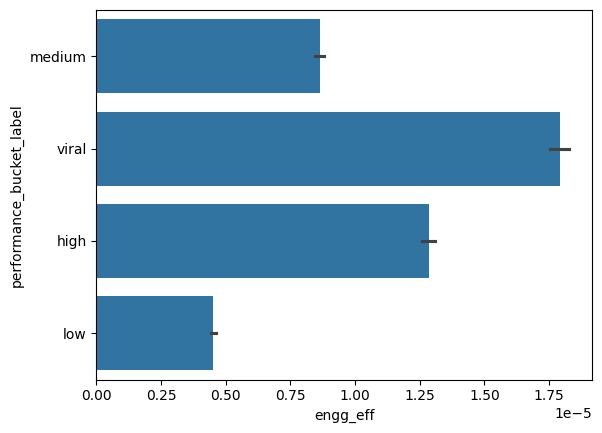

In [6]:
sns.barplot(data=ig, x='engg_eff', y='performance_bucket_label')

### Q80. Likes/comments/shares comparison by performance bucket


In [8]:
lcs = ig.melt(id_vars='performance_bucket_label', value_vars=['likes','saves','comments'])

<Axes: xlabel='performance_bucket_label', ylabel='value'>

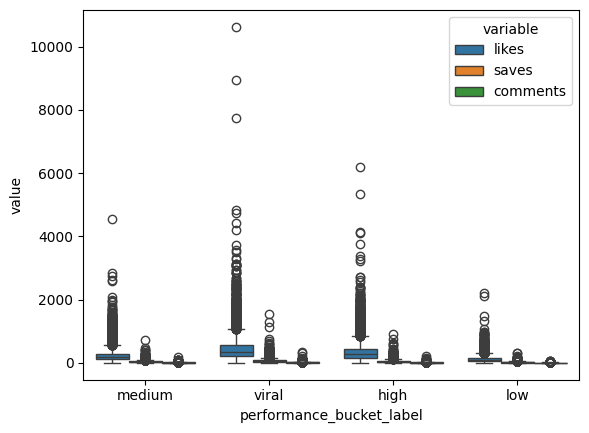

In [9]:
sns.boxplot(data=lcs, x='performance_bucket_label', y='value', hue='variable')

## I. ADVANCED / PORTFOLIO-LEVEL VISUALS


### Q81. Pairplot of engagement_rate, reach, impressions, followers_gained

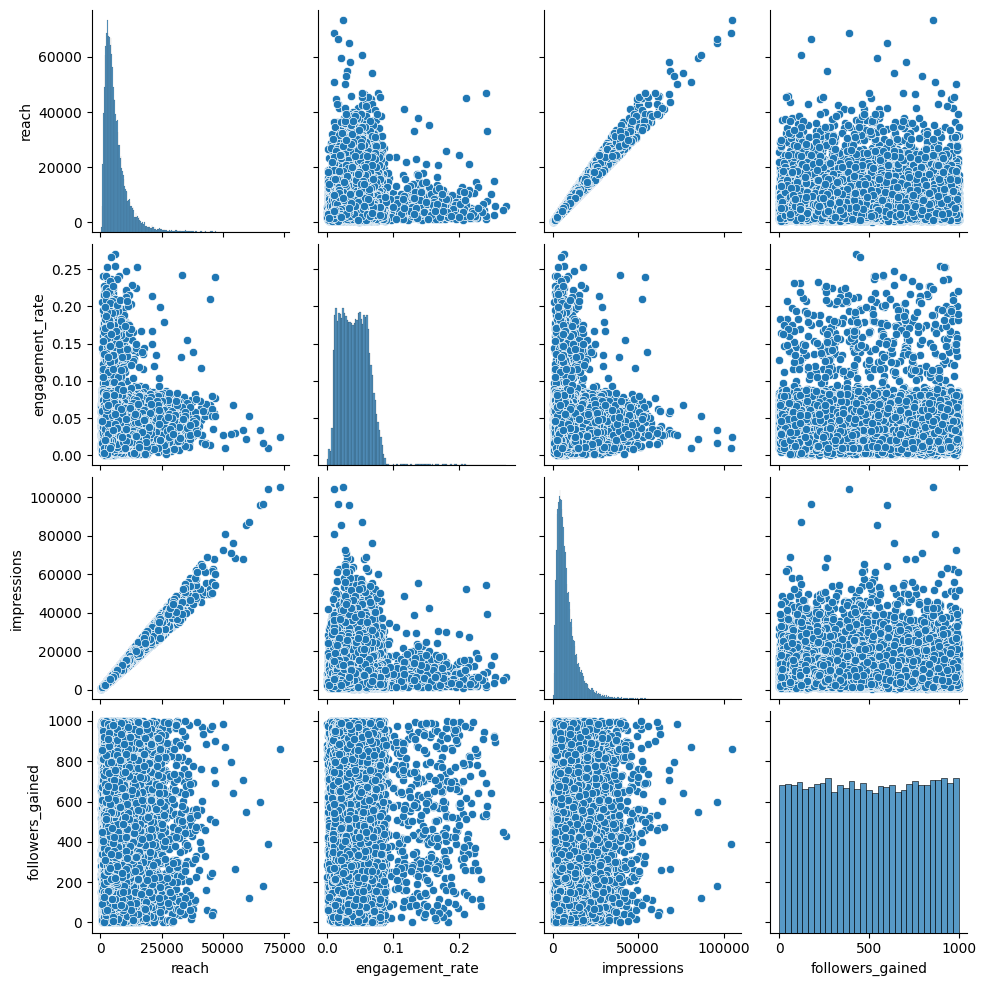

In [10]:
sns.pairplot(ig[['reach','engagement_rate','impressions','followers_gained']])

### Q82. Correlation heatmap of engagement metrics


<Axes: >

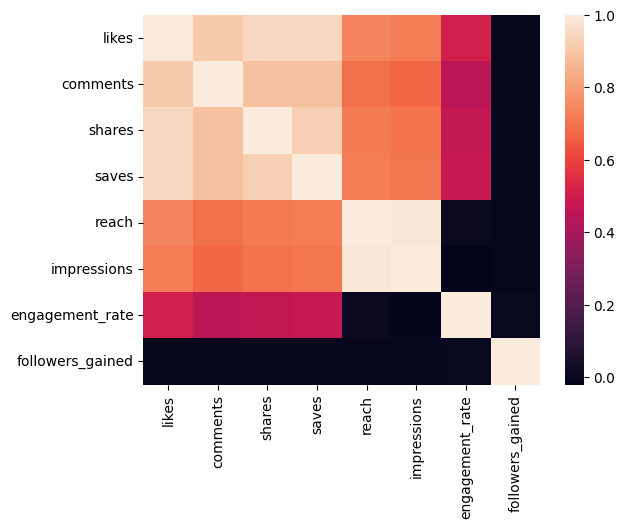

In [11]:
sns.heatmap(ig[['likes','comments','shares','saves','reach','impressions','engagement_rate','followers_gained']].corr())

### Q83. Bubble chart: reach vs engagement rate (size = followers_gained)


<Axes: xlabel='reach', ylabel='engagement_rate'>

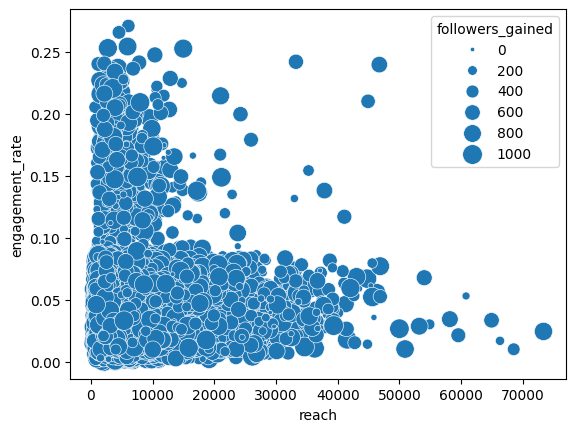

In [15]:
sns.scatterplot(data=ig, x='reach', y='engagement_rate', size='followers_gained', sizes=(10,200))

### Q84. Engagement rate vs impressions (log scale)


<Axes: xlabel='engagement_rate', ylabel='impressions'>

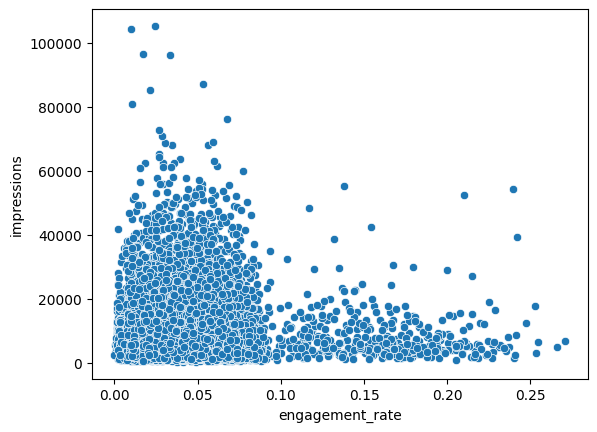

In [16]:
sns.scatterplot(data=ig, x='engagement_rate', y='impressions')

### Q85. Followers gained vs engagement rate


<Axes: xlabel='engagement_rate', ylabel='followers_gained'>

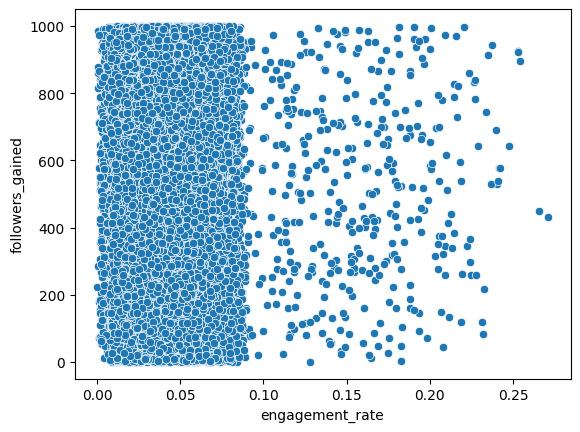

In [17]:
sns.scatterplot(data=ig, x='engagement_rate', y='followers_gained')

### Q86. Saves vs shares scatter


<Axes: xlabel='saves', ylabel='shares'>

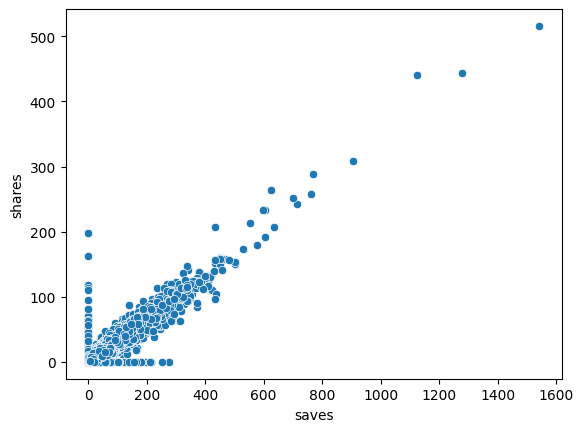

In [18]:
sns.scatterplot(data=ig, x='saves', y='shares')

### Q87. Performance bucket vs engagement stability (boxplot)


<Axes: xlabel='performance_bucket_label', ylabel='engagement_rate'>

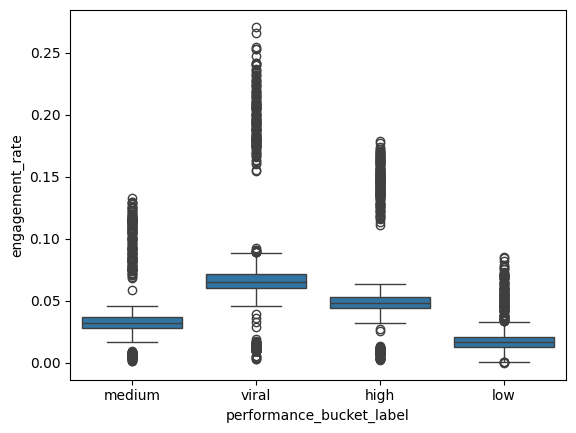

In [19]:
sns.boxplot(data=ig, x='performance_bucket_label', y='engagement_rate')

### Q88. Media type × performance bucket heatmap


In [20]:
pivot = pd.crosstab(ig['media_type'], ig['performance_bucket_label'])

<Axes: xlabel='performance_bucket_label', ylabel='media_type'>

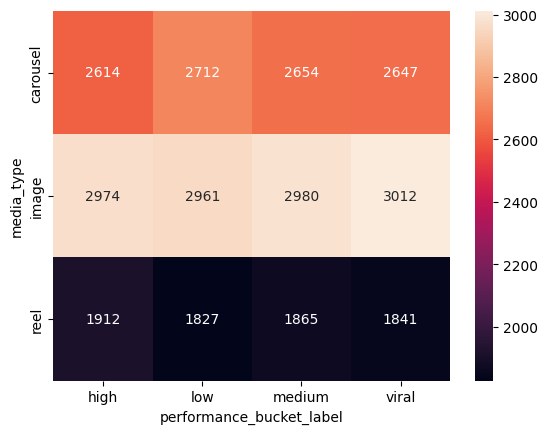

In [21]:
sns.heatmap(pivot, annot=True, fmt='d')

### Q89. Content category × performance bucket heatmap


In [22]:
pivot = pd.crosstab(ig['content_category'], ig['performance_bucket_label'])

<Axes: xlabel='performance_bucket_label', ylabel='content_category'>

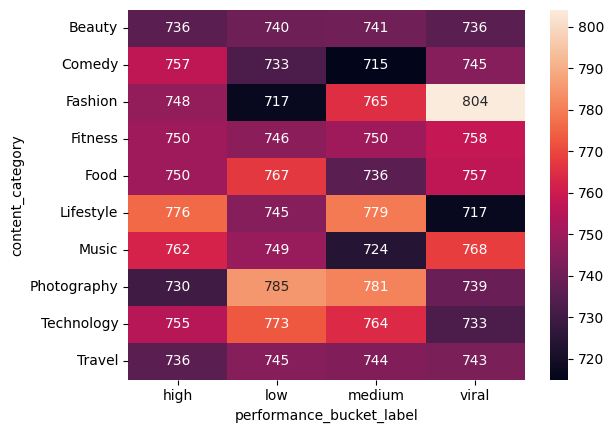

In [23]:
sns.heatmap(pivot, annot=True, fmt='d')

### Q90. Dashboard-style view: reach, engagement rate & followers gained

<Axes: xlabel='reach', ylabel='followers_gained'>

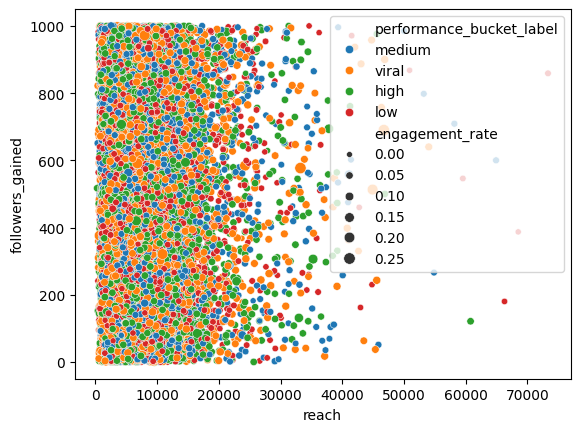

In [25]:
sns.scatterplot(data=ig, x='reach', y='followers_gained', size='engagement_rate', hue='performance_bucket_label')